# Исследовательский анализ данных интернет-магазина компьютерных игр "Стримчик"

__Постановка задачи:__  

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).   
Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

__Вопросы для исследования:__

* Сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
* Как менялись продажи по платформам. Платформы с наибольшими суммарными продажами и распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
* Прогноз на 2017 год.
    - Какие платформы лидируют по продажам, растут или падают? Несколько потенциально прибыльных платформ.
    - Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.
    - Общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?
* Портрет пользователя каждого региона:
    - Самые популярные платформы (топ-5). Различия в долях продаж.
    - Самые популярные жанры (топ-5).
    - Влияет ли рейтинг ESRB на продажи в отдельном регионе?

### Общая информация о данных

In [1]:
# импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# загрузка данных
try:
    #data = pd.read_csv('/datasets/games.csv', sep='\t', decimal='.')
    data = pd.read_csv('/datasets/games.csv')
except:
    #data = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv', sep='\t', decimal='.')
    data = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

In [3]:
# изучение общей информации таблиц будем делать по сценарию
def show_info(table):
    
    # общая информация
    table.info()
    
    # проверка наименований столбцов
    print('\nНаименования столбцов:')
    print(table.columns)
    
    # пропущенные значения
    print('\nПропущенные значения:')
    total_entries = table.shape[0]
    na_columns = table.isnull().sum().reset_index().rename(columns = {'index': 'column', 0: 'nan_qty'}, inplace = False)
    na_columns['na_percent'] = round((na_columns['nan_qty'] / total_entries * 100), 1)
    display(na_columns)
    
    # полные дубликаты
    print('\nПолные дубликаты:', table.duplicated().sum())
    
    # голова таблицы
    display(table.head(5))

In [4]:
show_info(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB

Наименования столбцов:
Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

Пропущенные значения:


,column,nan_qty,na_percent
0,Name,2,0.0
1,Platform,0,0.0
2,Year_of_Release,269,1.6
3,Genre,2,0.0
4,NA_sales,0,0.0
5,EU_sales,0,0.0
6,JP_sales,0,0.0
7,Other_sales,0,0.0
8,Critic_Score,8578,51.3
9,User_Score,6701,40.1



Полные дубликаты: 0


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


*Описание данных*
- `Name` — название игры
- `Platform` — платформа
- `Year_of_Release` — год выпуска
- `Genre` — жанр игры
- `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
- `EU_sales` — продажи в Европе (миллионы проданных копий)
- `JP_sales` — продажи в Японии (миллионы проданных копий)
- `Other_sales` — продажи в других странах (миллионы проданных копий)
- `Critic_Score` — оценка критиков (максимум 100)
- `User_Score` — оценка пользователей (максимум 10)
- `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

In [5]:
len(data['Name'].unique())

11560

#### Вывод по общему анализу данных:

- 16715 записей о проданных играх
- 11560 названий игр из 16715 уникальны. Т.е., примерно 5200 игр мультиплатформенные.

**Пропущенные значения:**
   - Name - 2 записи - 0.01% от общего
   - Gemre - 2 записи - 0.01% от общего
   - Year_of_Release - 269 записи - 1.6% от общего
   - Critic_Score - 8578 записи - 51.3% от общего
   - User_Score - 6701 записи - 40.1% от общего
   - Rating - 6766 записи - 40.5% от общего  
   
   
**update:** При дальнейшем анализе обнаружено большее количество пропущенных занчений в столбце 'user_score' -  
пропущего 9125 записей - 54.6% от общего.

**Необходимые преобразования типов:**
   - Столбец 'Year_of_Release' (год выпуска) необходимо перевести в int
   - Столбец 'User_Score' (оценка пользователей (максимум 10) необходимо перевести в тип float

Текстовые категориальные данные: 'Платформа', 'Жанр игры' потенциально могуть содержат вариации в написании.

### Предобработка данных

#### Приведение названий столбцов к нижнему регистру

In [6]:
# корректировка наименований столбцов - перевод в нижний регистр
for column in data.columns:
    data.rename(columns= {column : column.lower()}, inplace= True)
display(data.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

#### Работа с неявными дубликами

In [7]:
data.loc[data[['name', 'platform','year_of_release']].duplicated()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
14244,NaN,GEN,1993.0,NaN,0.0,0.00,0.03,0.0,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012.0,Sports,0.0,0.01,0.00,0.0,83.0,5.5,E


In [8]:
data.query('name == "Madden NFL 13" and platform == "PS3"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E


Удалим неявные дубликаты, содержащие меньше полезной информации.

In [9]:
drop_ndx = data.loc[data[['name', 'platform','year_of_release']].duplicated()].index
data.drop(index= drop_ndx, inplace= True)
len(data.loc[data[['name', 'platform','year_of_release']].duplicated()])

0

#### Обработка пропусков

##### Название игр - name  
**name** - 2 записи - 0.01%  
Заполним значениями '_unknown'.

In [10]:
print('Пропусков до заполнения:', data['name'].isna().sum())
data['name'] = data['name'].fillna(value= '_unknown')
print('Пропусков после заполнения:', data['name'].isna().sum())

Пропусков до заполнения: 1
Пропусков после заполнения: 0


#### Жанр игры - genre  
**Gemre** - 2 записи - 0.01%
Аналогично, заполним '_unknown'

In [11]:
print('Пропусков до заполнения:', data['genre'].isna().sum())
data['genre'] = data['genre'].fillna(value= '_unknown')
print('Пропусков после заполнения:', data['genre'].isna().sum())

Пропусков до заполнения: 1
Пропусков после заполнения: 0


#### Год выпуска игры - year_of_release  
##### Заполение пропусков year_of_release  

**year_of_release** - 269 записи - 1.6%  
Восстановление данных теоретически возможно вручную по названиям игр. Но в силу большой трудоемкости и незначительного числа пропусков не будем прибегать к такому способу.  
Для корректного перевода значений в формат целочисленных заполним пропуски значением-маркером `1900`

In [12]:
print('Пропусков до заполнения:', data['year_of_release'].isna().sum())
data['year_of_release'].fillna(1900, inplace= True)
print('Пропусков после заполнения:', data['year_of_release'].isna().sum())

Пропусков до заполнения: 269
Пропусков после заполнения: 0


##### Преобразование типа year_of_release  

Столбец 'Year_of_Release' (год выпуска) необходимо перевести из float в int, т.к. год бывает только целочисленным значением.

In [13]:
# Меняем year_of_release на int64
print('Пропущенных до:', data['year_of_release'].isna().sum())

try:
    data['year_of_release'] = data['year_of_release'].astype('Int64')
    print('Преобразование - Ok')
except:
    print('Есть неконвертируемые значения.')
    
print('Пропущенных после:', data['year_of_release'].isna().sum())
data['year_of_release'].dtypes

Пропущенных до: 0
Преобразование - Ok
Пропущенных после: 0


Int64Dtype()

#### Оценка критиков - critic_score  и Оценка пользователей - user_score  
**Critic_Score** - 8578 записи - 51.3% от общего

**User_Score** - 9125 записей - 54.6% от общего  

В данных есть две перекликающиеся оценки: оценка критиков и оценка пользователей. С большой веротяностью эти оценки могут быть близки, что дает возможность сделать приблизительные заполнения пропущенных данных, если есть ситуации с пропуском одной из двух оценок.  
Но, с другой стороны, это может привести к искажению результатов, особенно, если в иссследовании важно находить различия в оценке пользователями и критиками.  

Поэтому, принимаем решение не заполнять пропуски оценок критиков и оценок пользователей усредненными или коррелирующими значениями.   
Вместо этого заполним такие пропущенные значения значением-маркером `-1` с целью избавится от Nan.

In [14]:
data['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

In [15]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

##### Избавляемся от значений 'tbd'

In [16]:
num_tbd = data.query('user_score == "tbd"')['user_score'].count()
num_na = data['user_score'].isna().sum()
total_entries = data.shape[0]
na_percent = round(((num_tbd + num_na) / total_entries * 100), 1)
print('Значений nan: ', num_na)
print('Значений tbd: ', num_tbd)
print('Всего пропущено: {}, {}%'.format(num_na + num_tbd, na_percent))

Значений nan:  6700
Значений tbd:  2424
Всего пропущено: 9124, 54.6%


Кроме значений nan в `user_score` замечено текстовое значение 'tbd'. Что увеличивает количество пропущенных значений оценок пользователей до **9125** - 54,6%.  
Для дальнейшей проработки значения 'tbd' заменим на `nan`.

In [17]:
# замена 'tbd' на NaN
data.loc[data.loc[:,'user_score'] == 'tbd', 'user_score'] = np.nan
print('Пропусков до заполнения:', data['user_score'].isna().sum())

Пропусков до заполнения: 9124


##### Заполняем значением-маркером -1

In [18]:
# заполненение значением-маркером -1
data['critic_score'].fillna(value= -1, inplace= True)
print('Пропусков после заполнения:', data['critic_score'].isna().sum())

Пропусков после заполнения: 0


In [19]:
# заполненение значением-маркером -1
data['user_score'].fillna(value= -1,  inplace= True)
print('Пропусков после заполнения:', data['user_score'].isna().sum())

Пропусков после заполнения: 0


##### Преобразование типа данных critic_score и user_score

In [20]:
# Преобразуем critic_score в числовой формат (float64)
# Обработку ошибок не делаем, т.к. задействуем параметр errors
data.loc[:,'critic_score'] = pd.to_numeric(data['critic_score'], errors= 'coerce')
data['critic_score'].dtypes

dtype('float64')

In [21]:
# Преобразуем  user_score в числовой формат (float64)
# Обработку ошибок не делаем, т.к. задействуем параметр errors
data.loc[:,'user_score'] = pd.to_numeric(data['user_score'], errors= 'coerce')
data['user_score'].dtypes

dtype('float64')

##### Заполнение оценок критиков и пользователей для мультиплатформенных игр

Другая возможность заполнить пропуски - это воспользоваться тем фактом, что у нас порядка 5200 игр выпущены на различных платформ одновременно. Если предположить, что портирование игры на разные платформы мало влияет на её рейтинг и оценки, можно заполнить значения рейтингом с другой платформы, если они имеются.  

_Тем не менее, такой способ заполнения приводит к искажению данных, особенно, если нам потребуется анализировать разницу в оценках пользователей и критиков. Также такой метод заполнения не учитывает регион игры, т.к. в различных регионах могут быть популярные различные платформы. А такое различие также моет привести и к различиям в популярности и оценке игр._

In [22]:
# выделим только те игры, что выпущены для нескольких платформ
multi_platform_games = (data[['name','critic_score','user_score']]
            .groupby('name').agg({'name' : 'count', 'critic_score':'mean','user_score':'mean'})
            .query('(name > 1)')    # Интересуют только мультиплатформенные
            .rename(columns = {'name':'count'})
            .reset_index()
          )
multi_platform_games.head(2)

,name,count,critic_score,user_score
0,Frozen: Olaf's Quest,2,-1.0,-1.00
1,007: Quantum of Solace,6,53.0,4.25


In [23]:
print('Мультиплатформенных игр:', len(multi_platform_games))
# Нет смысла обрабатывать те у которых все значения пропущены
# Посчитаем такие
print('Оба значения пропущены и с этим уже ничего не сделать в количестве:',
      len(multi_platform_games.query('(critic_score == -1 and user_score == -1)'))
    )
# и отбросим их
multi_platform_games = multi_platform_games.query('(critic_score > 0 | user_score > 0)')

# Нет смысла обрабатывать те, что без пропусков
print('Оба значения не пропущены и нет смысла обрабатывать в количестве:',
      len(multi_platform_games.query('(critic_score > 0 and user_score > 0)'))
    )
# и отбросим их
multi_platform_games = multi_platform_games.query('(critic_score == -1 or user_score == -1)')

print('Интересно обработать значения в количестве:',
      len(multi_platform_games)
    )

Мультиплатформенных игр: 2805
Оба значения пропущены и с этим уже ничего не сделать в количестве: 717
Оба значения не пропущены и нет смысла обрабатывать в количестве: 1904
Интересно обработать значения в количестве: 181


In [24]:
for index, row in multi_platform_games.iterrows():
    name = row['name']
    
    critic_score_mean = row['critic_score']
    data.loc[(data['name'] == name) & (data['critic_score'] == -1), 'critic_score'] = critic_score_mean

    user_score_mean = row['user_score']
    data.loc[(data['name'] == name) & (data['user_score'] == -1), 'user_score'] = user_score_mean

In [25]:
total_entries = data.shape[0]

miss_cs = len(data.query('critic_score == -1'))
miss_cs_percent = round((miss_cs / total_entries * 100), 1)
miss_us = len(data.query('user_score == -1'))
miss_us_percent = round((miss_us / total_entries * 100), 1)
print('Пропущенных значений critic_score: {}, {}%'.format(miss_cs, miss_cs_percent))
print('Пропущенных значений user_score: {}, {}%'.format(miss_us, miss_us_percent))

Пропущенных значений critic_score: 8498, 50.8%
Пропущенных значений user_score: 9035, 54.1%


#### Рейтинг - rating  
**Rating** - 6766 записи - 40.5% от общего  

Отсутствующие данные рейтинга ESRB восстановить невозможно.  
Также, вероятно, что такие данные предоставляются не во всех регионах.

Вариант восстановления данных для игр, выпущенных для разных платформ, также отбросим из-за вероятности искажения данных по различным регионам, которые предстоит исследовать.  
Для избавления от NaN, заполним значением-маркером `-1`

##### Заполнение маркером

In [26]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [27]:
# заполненение значением-маркером -1
print('Пропусков до заполнения:', data['rating'].isna().sum())
data['rating'].fillna(value= 'unknown',  inplace= True)
print('Пропусков после заполнения:', data['rating'].isna().sum())

Пропусков до заполнения: 6765
Пропусков после заполнения: 0


In [28]:
data['rating'].unique()

array(['E', 'unknown', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

#### Вывод по предобработке данных:

- Названия столбцов приведены к нижнему регистру.  


- Название игр - name
Было пропущенных значений name - 2 записи - 0.01%. Заполнены значением `'_unknown'`.  
Пропуски в названии игры и годе её выпуска явно вызваны потерей информации. Причины пропусков не понятны, т.к. информация взята из открытых источников.  


- Жанр игры - genre  
Было пропущенных значений gemre - 2 записи - 0.01%. Заполнены значением `'_unknown'`. 
 
 
- Год выпуска игры - year_of_release  
Было пропущенных значений year_of_release - 269 записи - 1.6%. Заполнены значением `1900`  
Причины пропуска неизвестны. Существует трудоемкая возможность заполнения данных вручную.  
Произведено преобразование типа к int64.  


- Оценка критиков - critic_score  и Оценка пользователей - user_score  
Critic_Score - 8578 записи - 51.3% от общего  
User_Score - 9125 записей - 54.6% от общего  
Доля пропущенных значений существенна. Часть пропусков данных (181 пропуск) были заполнены на основе предположения, что мультиплатформеные игры одинаково популярны на всех платформах. Для заполнения пропусков брались средние оценки с другой платформы. Такое заполнение не вполне верно, но значимость зависит от исследуемых вопросов.  
Остальнрые пропуски заполнены значением-маркером `-1`  
Тип данных преобразован в int64.  


- Рейтинг - rating  
Было пропущенных значений Rating - 6766 записи - 40.5% от общего.  
Отсутствующие данные рейтинга ESRB восстановить невозможно. Также, вероятно, что такие данные предоставляются не во всех регионах.  
Для избавления от NaN, пропуски заполнены значением-маркером `-1`

### Суммарные продажи во всех регионах
Данные о продажах (в млн. копий) содержатся в столбцах: 'na_sales', 'eu_sales', 'jp_sales', 'other_sales'. (Пропусков нет)    
Посчитаем сумму и запишем в новый столбец 'total_sales'.

In [29]:
data['total_sales'] = data[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1, min_count= 1)
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,unknown,31.38


In [30]:
print("Данные содержат информацию о продажах {} млн. копий игр.".format(data['total_sales'].sum()))

Данные содержат информацию о продажах 8915.67 млн. копий игр.


#### Вывод по суммарным продажам:
Данные содержат информацию о продажах **8915.71 млн.** копий игр.

### Сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

In [31]:
d = data.groupby('year_of_release')['name'].count()

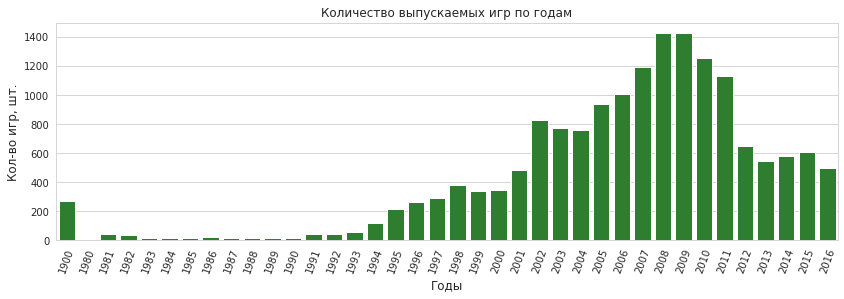

In [32]:
# размер визуализации
plt.rcParams['figure.figsize'] = (14, 4)
sns.set_style("whitegrid")

b = sns.barplot(x=d.index, y=d.values, color='forestgreen')
b.set_title("Количество выпускаемых игр по годам")
b.set_xlabel("Годы", fontsize=12)
b.set_ylabel("Кол-во игр, шт.", fontsize=12)
#plt.xticks(rotation='vertical')
plt.xticks(rotation=70)
#plt.tight_layout()
plt.show()

#### Вывод по количеству игр, выпускавшихся в разные годы:

`1900` год - это значение-маркёр для пропущенных данных.  
- В период с 1980 по 1990 годы компьютерные игры были доступны немногим. В 1991 году наюлюдается саое начало развития этого рынка, а уже в 1993-1994 происходит удвоение количества продаваемых игр.  
- В 2001-2002 году происходит значительный скачок и дальнейший бурный рост до 2008 года.
- С 2009 по 2013 года происходит спад в 2 раза. 
- В период с 2012 до 2016 продажи остаются примерно на одном уровне.  

Характер рынка довольно динамичен. Видно, что ситуация может быстро измениться даже в течение 2-3 лет.  
Также, далее будет проведен анализ популярных платформ, где ожидается также небольшое время жизни.  

Из-за высокой динамики представляется нецелессобразным рассмотрение длительной рестроспективы при анализе и прогнозировании. 
Скорее всего, оптимальным для рассмотрения будет период не более 2-3 лет.

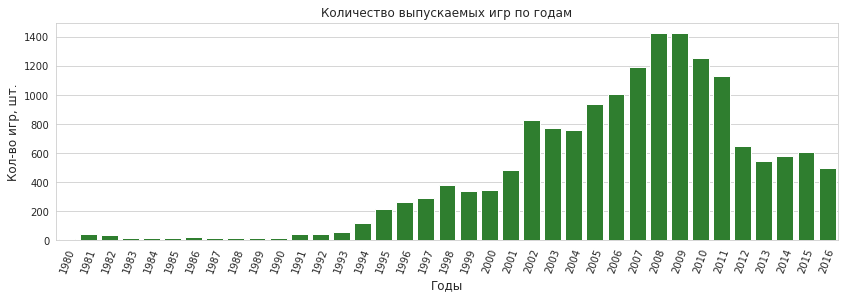

In [33]:
d = data.query('year_of_release > 1900').groupby('year_of_release')['name'].count()

plt.rcParams['figure.figsize'] = (14, 4)
sns.set_style("whitegrid")

b = sns.barplot(x=d.index, y=d.values, color='forestgreen')
b.set_title("Количество выпускаемых игр по годам")
b.set_xlabel("Годы", fontsize=12)
b.set_ylabel("Кол-во игр, шт.", fontsize=12)
#plt.xticks(rotation='vertical')
plt.xticks(rotation=70)
#plt.tight_layout()
plt.show()

### Как менялись продажи по платформам. Платформы с наибольшими суммарными продажами и распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [34]:
d = (data.groupby('platform')
     .agg(sum_sales=pd.NamedAgg(column='total_sales', aggfunc='sum'))
     .sort_values(by= 'sum_sales', ascending=False)
    )

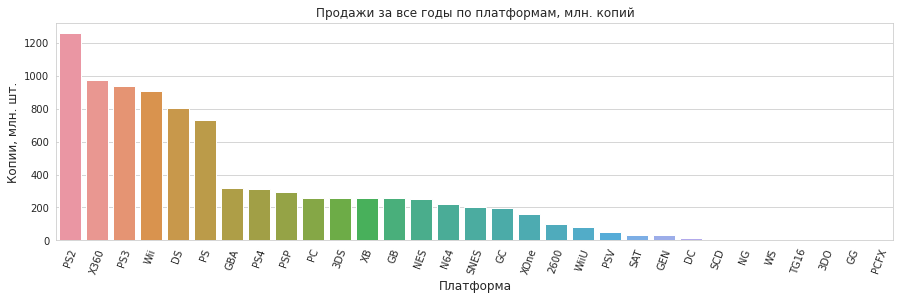

In [35]:
plt.rcParams['figure.figsize'] = (15, 4)
sns.set_style("whitegrid")

b = sns.barplot(data=d, x=d.index, y='sum_sales')
b.set_title("Продажи за все годы по платформам, млн. копий")
b.set_xlabel("Платформа", fontsize=12)
b.set_ylabel("Копии, млн. шт.", fontsize=12)
plt.xticks(rotation=70)
plt.show()

**Топ 6 платформ:**

In [36]:
display(d.head(6))

,sum_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.64
Wii,907.51
DS,806.12
PS,730.86


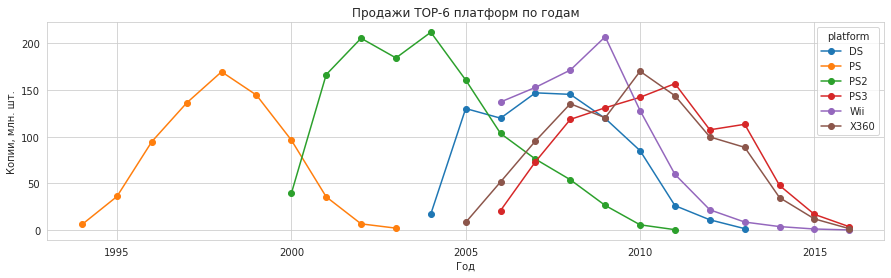

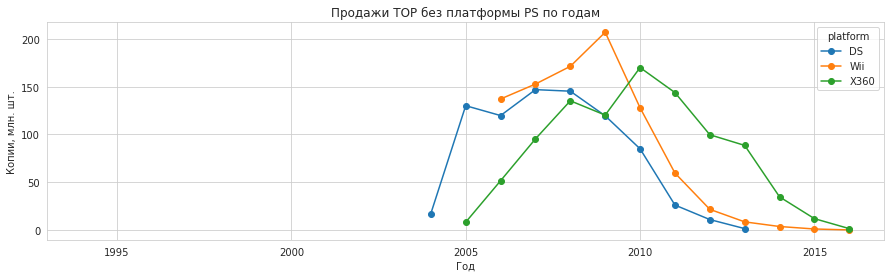

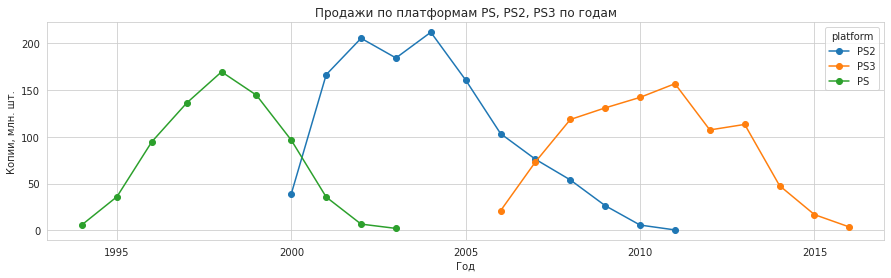

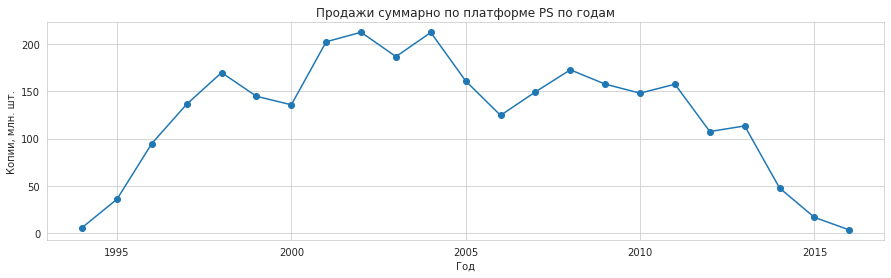

In [37]:
# top_6_platforms = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']
top = d.head(6).index
(data.query('platform in @top and year_of_release > 1993')
     .pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
     .plot(kind='line', style='o-', xlim=[1993,2017], figsize= [15,4], grid=True)
)
plt.title("Продажи TOP-6 платформ по годам")
plt.xlabel("Год")
plt.ylabel("Копии, млн. шт.")
plt.show()

# Продажи без платформы PS
other_platforms = ['X360', 'Wii', 'DS']
top = d.head(6).index
(data.query('platform in @other_platforms and year_of_release > 1993')
     .pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
     .plot(kind='line', style='o-', xlim=[1993,2017], figsize= [15,4], grid=True)
)
plt.title("Продажи TOP без платформы PS по годам")
plt.xlabel("Год")
plt.ylabel("Копии, млн. шт.")
plt.show()

# Продажи только по платформам PS, PS2, PS3
ps_platforms = ['PS2', 'PS3', 'PS']
d = (data.query('platform in @ps_platforms and year_of_release > 1993')
     .pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
    )
d[ps_platforms].plot(kind='line', style='o-', xlim=[1993,2017], figsize= [15, 4], grid=True)
plt.title("Продажи по платформам PS, PS2, PS3 по годам")
plt.xlabel("Год")
plt.ylabel("Копии, млн. шт.")
plt.show()

# Продажи суммарно только по платформам PS, PS2, PS3
d['total_PS'] = d[ps_platforms].sum(axis=1, skipna= True) 

d['total_PS'].plot(kind='line', style='o-', xlim=[1993,2017], figsize= [15, 4], grid=True)
plt.title("Продажи суммарно по платформе PS по годам")
plt.xlabel("Год")
plt.ylabel("Копии, млн. шт.")
plt.show()

#### Выводы о продажах по годам среди платформ:

*Топ-6 платформ по продажам составляют:*
- PS: 1994 - 2003 гг. (7 лет)
- PS2: 2000 - 2011 гг. (11 лет)
- PS3: 2006 - 2016 гг. (10 лет)
- DS: 2004 - 2013 гг. (9 лет)
- X360: 2005 - 2016 гг. (11 лет)
- Wii: 2006 - 2016 гг. (10 лет)

Платформы PS, PS2 были безоговорочными и единственными лидерами рынка с 1994 по 2005 год.  
С 2005 года на рынке выступили новые платформы.  
В 2010 плаформа Wii потеряла лидерство и с тех пор, практически на равных в лидерах остаются платформы X360 и PS3.  

За срок жизни платформы можно принять срок в **9-10 лет**.  
При этому следует учесть, что период роста продаж с 1 до 4 лет.  
Пик продаж платформы приходится на её 4...6 годы жизни. В годы смены поколений консоли происходит характерное "проседание" в продажах, когда предыдущее поколение теряет продажи, а новое не успело их нарастить.  
После 8 лет плаформа прктически перестает быть интересной.  

При прогнозировании стоит учитывать только наиболее современные платформы.

### Прогноз на 2017 год.
#### Какие платформы лидируют по продажам, растут или падают? Несколько потенциально прибыльных платформ.

В связи с высокой динамикой рынка при прогнозировании стоит учитывать лишь короткий временной период - 2-4 года.  
Также, следует уделять внимание лишь наиболее новым платформам, которые потенциально будут развиваться в течение первых 4 лет своего существоввания.  
Данные за 2016 год очевидно не полные.

Для построения прогноза на 2017 год возьмём данные за 2014, 2015 годы и неполный 2016 год.

In [38]:
adata = data.query('year_of_release in [2014, 2015, 2016]')
print('Размер данных полный: {} записей.'.format(data.shape[0]))
print('Размер данных для анализа: {} записей.'.format(adata.shape[0]))
print('Размер данных для анализа: {} %'.format(round(adata.shape[0] / data.shape[0] * 100, 1)))

Размер данных полный: 16713 записей.
Размер данных для анализа: 1689 записей.
Размер данных для анализа: 10.1 %


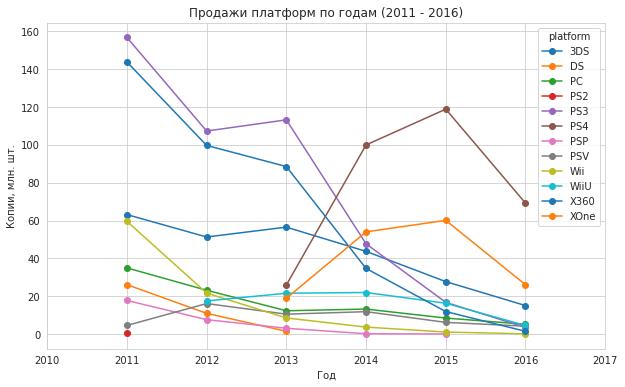

In [39]:
(data.query('year_of_release >= 2011 & year_of_release <= 2016')
     .pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
     .plot(kind='line', style='o-', xlim=[2010,2017], figsize= [10,6], grid=True)
)
plt.title("Продажи платформ по годам (2011 - 2016)")
plt.xlabel("Год")
plt.ylabel("Копии, млн. шт.")
plt.show()  

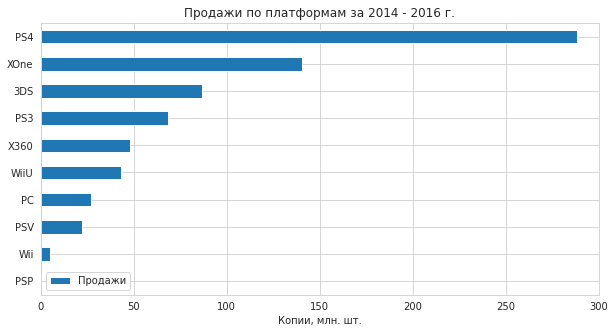

In [40]:
(adata
     .groupby('platform')
     .agg(sum_sales=pd.NamedAgg(column='total_sales', aggfunc='sum'))
     .sort_values(by= 'sum_sales', ascending=True)
     .plot(kind='barh', y='sum_sales', grid=True, figsize=(10, 5), label='Продажи', xlim= [0,300])
)
plt.title('Продажи по платформам за 2014 - 2016 г.')
plt.ylabel('')
plt.xlabel('Копии, млн. шт.')
plt.show()

В актуальном периоде. Лидирующие платформы: PS4, XOne, 3DS, PS3  
- Растущие платоформы: PS4, XOne
- На спаде продаж: все остальные, включая лидирующие 3DS, PS3
- Платформа PC наиболее стабильна на протяжении времени

**Ящики с усами для всех платформ**

In [41]:
d = (data
     .pivot_table(index='name', columns='platform', values='total_sales', aggfunc='sum')
    )

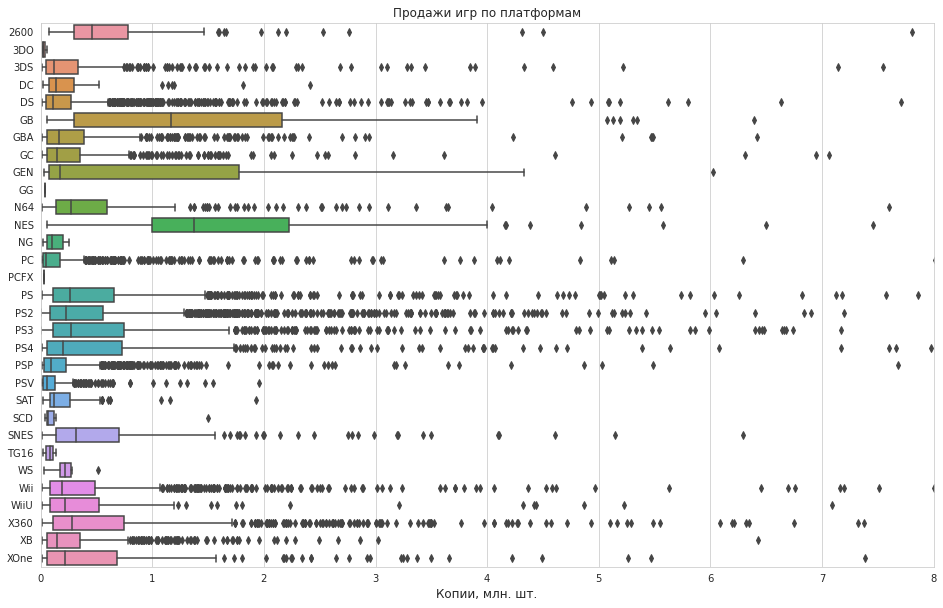

In [42]:
plt.rcParams['figure.figsize'] = (16, 10)

# График ограничен справа
plt.xlim(0, 8)

b = sns.boxplot(data=d, orient='h')
b.set_title('Продажи игр по платформам')
b.set_xlabel("Копии, млн. шт.", fontsize=12)
b.set_ylabel("")
plt.show()

Характер распределения количества проданных игр примерно одинаков большинства для приставок. Иммется довольно много выбросов с большим количеством продаж. Это бестселлеры.  
Самые характерины представители: 3DS, DS, PS, PS2, PS3, PS4, PSP, SNES, Wii, WiiU, X360, XB, XOne.

Выделяются платформы, где существенно меньше явных бестселлеров, но довольно высокие средние значения по кол-ву проданных копий: GB, GEN, NES.

Также, интересную особенность имеет платформа PС, где есть очень успешные бестселлеры наряду с невысокими средними продажами.



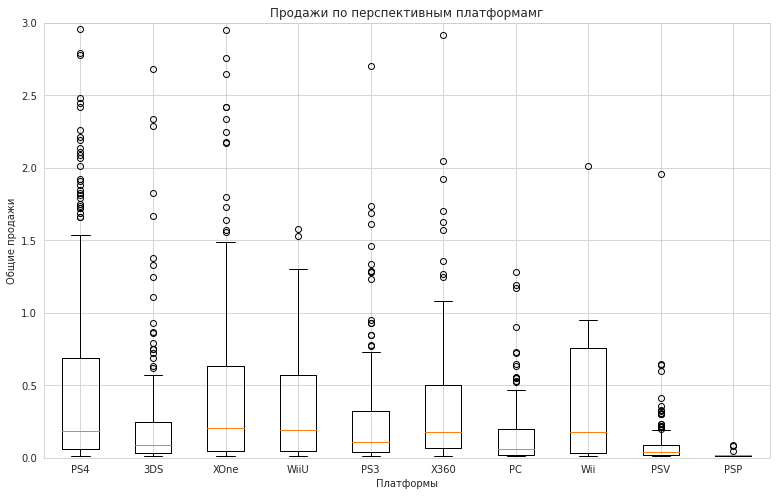

In [43]:
#Код ревьюера
import matplotlib.pyplot as plt

plt.figure(figsize=(13, 8))
plt.boxplot([adata['total_sales'][adata['platform'] == platform] for platform in adata['platform'].unique()],
            labels=adata['platform'].unique())

plt.title('Продажи по перспективным платформамг')
plt.xlabel('Платформы')
plt.ylabel('Общие продажи')
plt.ylim(0, 3)

plt.show()

In [44]:
d.head(10)

platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,...,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
name,,,,,,,,,,,,,,,,,,,,,
Beyblade Burst,NaN,NaN,0.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fire Emblem Fates,NaN,NaN,1.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Frozen: Olaf's Quest,NaN,NaN,0.59,NaN,0.51,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Haikyu!! Cross Team Match!,NaN,NaN,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Tales of Xillia 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'98 Koshien,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
.hack//G.U. Vol.1//Rebirth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
.hack//G.U. Vol.2//Reminisce,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
.hack//G.U. Vol.2//Reminisce (jp sales),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Выбор потенциально прибыльных платформ**  
- Потенциально прибыльные платформы: PS4, XOne, PC

В качесве потенциально прибыльных выбраны платформы: PS4, XOne - как растущие, а также платформа имеющая другой характер срока жизни в отличие от приставок - PC.


In [45]:
actual_platforms = ['XOne','PS4','PC']

d = (adata
     .query('platform in @actual_platforms')
     .pivot_table(index='name', columns='platform', values='total_sales', aggfunc='sum')
    )

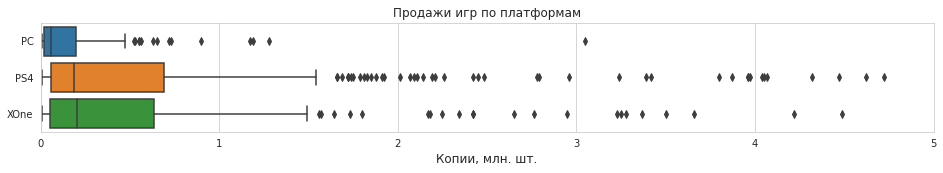

In [46]:
plt.rcParams['figure.figsize'] = (16, 2)

# График ограничен справа
plt.xlim(0, 5)

b = sns.boxplot(data=d, orient='h')
b.set_title('Продажи игр по платформам')
b.set_xlabel("Копии, млн. шт.", fontsize=12)
b.set_ylabel("")
plt.show()

In [47]:
(adata
     .query('platform in @actual_platforms')
     .pivot_table(index='name', columns='platform', values='total_sales', aggfunc='sum')
     .describe()
)

platform,PC,PS4,XOne
count,151.000000,376.000000,228.000000
mean,0.179139,0.766356,0.615614
std,0.329359,1.614969,1.046513
min,0.010000,0.010000,0.010000
25%,0.020000,0.057500,0.050000
50%,0.060000,0.185000,0.205000
75%,0.200000,0.690000,0.632500
max,3.050000,14.630000,7.390000


In [48]:
d = (adata
     .pivot_table(index='name', columns='platform', values='total_sales', aggfunc='sum')
    )

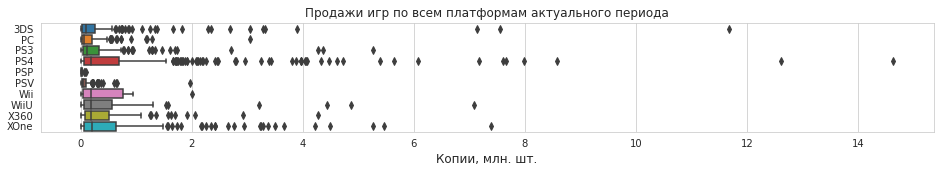

In [49]:
b = sns.boxplot(data=d, orient='h')
b.set_title('Продажи игр по всем платформам актуального периода')
b.set_xlabel("Копии, млн. шт.", fontsize=12)
b.set_ylabel("")
plt.show()

In [50]:
d.head()

platform,3DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
name,,,,,,,,,,
Beyblade Burst,0.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fire Emblem Fates,1.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Haikyu!! Cross Team Match!,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12-Sai. Honto no Kimochi,0.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12-Sai. Koisuru Diary,0.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


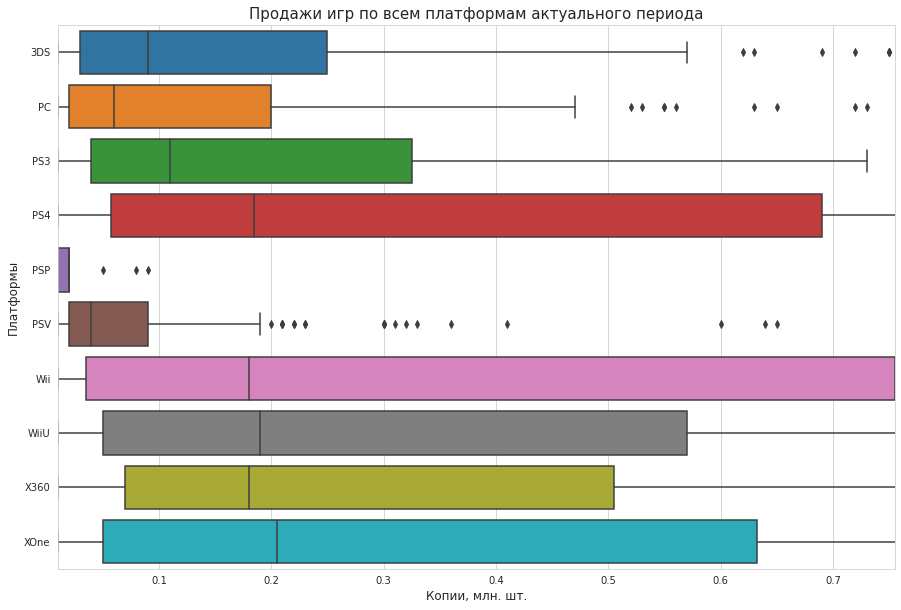

In [51]:

lower_bound = d.min().min()
upper_bound = d.quantile(0.75).max()

# Построение графика
plt.figure(figsize=(15, 10))
b = sns.boxplot(data=d, orient='h')
b.set_title('Продажи игр по всем платформам актуального периода', fontsize=15)
b.set_xlabel("Копии, млн. шт.", fontsize=12)
b.set_ylabel("Платформы", fontsize=12)

# Ограничение диапазона данных по оси X
b.set_xlim(lower_bound, upper_bound)

plt.show()

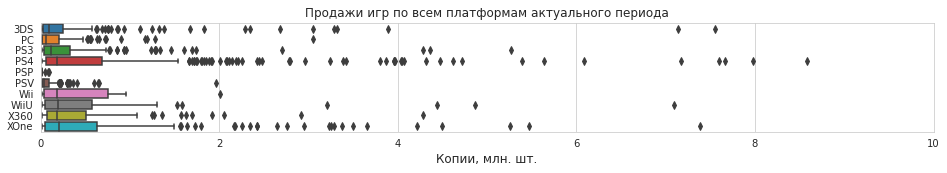

In [52]:
# График ограничен справа
plt.xlim(0, 10)

b = sns.boxplot(data=d, orient='h')
b.set_title('Продажи игр по всем платформам актуального периода')
b.set_xlabel("Копии, млн. шт.", fontsize=12)
b.set_ylabel("")
plt.show()

#### Вывод о лидирующих и потенциально прибыльных платформах:

Характер распределения количества проданных игр примерно одинаков большинства для приставок. Иммется довольно много выбросов с большим количеством продаж. Это бестселлеры.
Самые характерины представители: 3DS, DS, PS, PS2, PS3, PS4, PSP, SNES, Wii, WiiU, X360, XB, XOne.

Выделяются платформы, где существенно меньше явных бестселлеров, но довольно высокие средние значения по кол-ву проданных копий: GB, GEN, NES.

Также, интересную особенность имеет платформа PС, где есть очень успешные бестселлеры наряду с невысокими средними продажами.
На платформе PC стандартное отклонение меньше, что говорит о том, что там преимущественно покупаются игры со схожей популярностью.   

В качестве актуального периода для построения прогноза выбран короткий промежуток данных - только за 2014, 2015 годы.  
Данные за 2016 не полные, поэтому не принимаются во внимание.  

В актуальном периоде лидирующие платформы: PS4, XOne, 3DS, PS3

- Растущие платоформы: PS4, XOne
- На спаде продаж: все остальные, включая лидирующие 3DS, PS3
- Платформа PC наиболее стабильна на протяжении времени

В качестве потенциально прибыльных платформ выбраны: PS4, XOne, PC  
Платформы PS4 и XOne являются потенциальными лидерами рынка и характер продаж для них характерен для рынка игр для приставок.  
Платформа PC имеет свои особенности в распределении продаж и отличается более долгим срок жизни платформы.

#### Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.

##### Корреляция между оценками пользователей и критиков


In [53]:
def show_corr_scores(platform):
    print('\nПлатформа', platform)
    print('Корреляция между оценкой критиков и пользователей:',
         adata.query('platform == @platform')['critic_score'].corr(adata.query('platform == @platform')['user_score']))
    
    (adata
         .query('platform == @platform')
         .plot(x='critic_score', y='user_score', kind='scatter', figsize= (4,4))
    )
    plt.title("Взаимосвязь оценок критиков и оценкой пользователей")
    plt.ylabel("Оценка пользователей")
    plt.xlabel("Оценка критиков")
    plt.show()
    return


Платформа XOne
Корреляция между оценкой критиков и пользователей: 0.7892082290405863


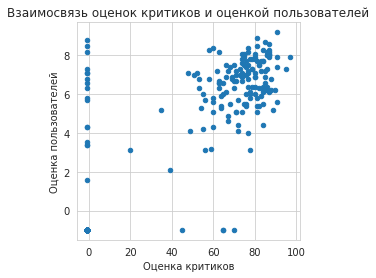


Платформа PS4
Корреляция между оценкой критиков и пользователей: 0.9091215768882033


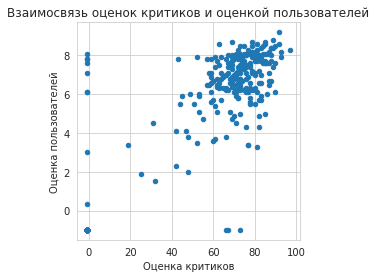


Платформа PC
Корреляция между оценкой критиков и пользователей: 0.803609267449305


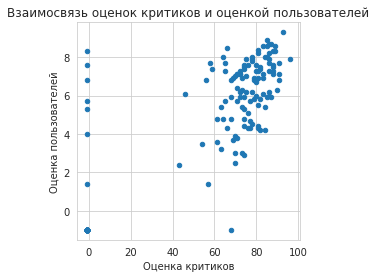

In [54]:
actual_platforms = ['XOne','PS4','PC']

for platform in actual_platforms:
    show_corr_scores(platform)

##### Корреляция между оценками критиков и продажами

In [55]:
def show_corr_sales(platform):
    print('\nПлатформа', platform)
    print('Корреляция между оценкой критиков и продажами:',
         adata.query('platform == @platform and critic_score > 0')['critic_score'].corr(adata.query('platform == @platform')['total_sales']))
    
    (adata
         .query('platform == @platform and critic_score > 0')
         .plot(x='critic_score', y='total_sales', kind='scatter', figsize= (4,4), xlim=[0, 100])
    )
    plt.title("Взаимосвязь оценок критиков и продажами")
    plt.ylabel("Продажи")
    plt.xlabel("Оценка критиков")
    plt.show()
    return


Платформа XOne
Корреляция между оценкой критиков и продажами: 0.42867694370333226


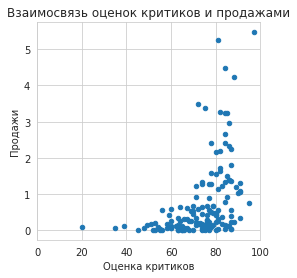


Платформа PS4
Корреляция между оценкой критиков и продажами: 0.40266141068104083


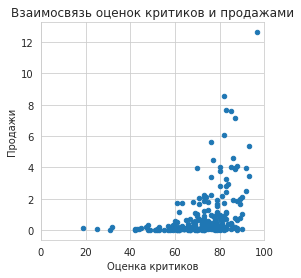


Платформа PC
Корреляция между оценкой критиков и продажами: 0.17463413769350036


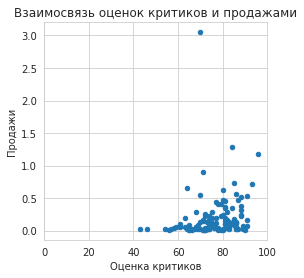

In [56]:
for platform in actual_platforms:
    show_corr_sales(platform)

##### Корреляция между оценками пользователей и продажами

Как показал анализ выше, оценки пользователей и оценки критиков довольно сильно коррелируют, особенно на приставках.  
Так при покупке игр слово, все-таки за пользователями, более интересна корреляция между оцеками пользователей и продажами.  

_Оценки с пропущеннными значениями не рассматриваются._

In [57]:
def show_corr_sales(platform):
    print('\nПлатформа', platform)
    print('Корреляция между оценкой пользователей и продажами:',
         adata.query('platform == @platform and user_score > 0')['user_score'].corr(adata.query('platform == @platform')['total_sales']))
    
    (adata
         .query('platform == @platform and user_score > 0')
         .plot(x='user_score', y='total_sales', kind='scatter', figsize= (4,4), xlim=[0, 10])
    )
    plt.title("Взаимосвязь оценок пользователей и продажами")
    plt.ylabel("Продажи")
    plt.xlabel("Оценка пользователей")
    plt.show()
    return


Платформа XOne
Корреляция между оценкой пользователей и продажами: -0.0421054281909911


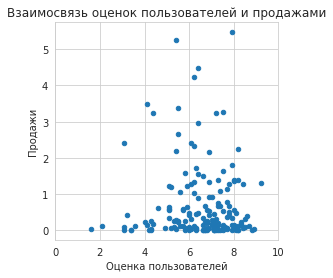


Платформа PS4
Корреляция между оценкой пользователей и продажами: -0.02924501396081272


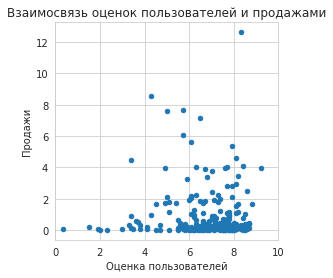


Платформа PC
Корреляция между оценкой пользователей и продажами: -0.07159665703472451


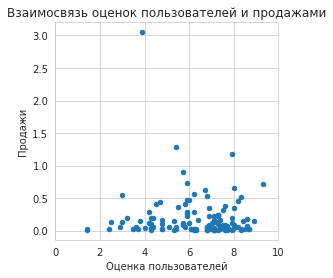

In [58]:
actual_platforms = ['XOne','PS4','PC']

for platform in actual_platforms:
    show_corr_sales(platform)

#### Вывод о влиянии на продажи отзывов пользователей и критиков:

Оценки пользователей и оценки критиков сильно коррелируют, особенно на приставках. На рынке игр PC такая корреляция чуть ниже. Там пользователи меньше согласны с критиками. Пользователи склонны давать более низкие оценки, чем критики. Для игр с более высокими баллами оценки критиков и пользователей совпадают лучше.  

Оценки пользователей и критиков более единодушны на платформах, которые уже давно на рынке. А в новых платформах пользователи могут оценивать игра ниже, чем критики.  

**Корреляция оценок критиков и продаж**  
На игровых приставках (XOne, PS4) между оценками критиков и продажами есть умеренная положительная связь (коэффициент корреляции около 0.4). Что говорит о том, что мнение профессионалов важно при прогнозировании продаж новой игры для этих платформ. (Критики являются "лидерами мнения" и это используется для продвижения новых игр. Налицие корелляции также указывает на эффективность продвижения через этот канал.)  

Для платформы PC корелляция с оценками критиков слабая (0.17), т.е. на платформе PC оценки критиков имеют меньшую роль.  

**Корреляция оценок пользователей и продаж**
Так при покупке игр слово, все-таки за пользователями, оценивалась корреляция между оценками пользователей и продажами.  
Продажи почти не коррелируют с оценками пользователей. Однако, игры с низкими оценками имеют низкие продажи. А игры с самым выскоми рейтингом могут быть не хитами продаж.

#### Общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [59]:
d = (adata
     .groupby('genre')
     .agg(sum_sales=pd.NamedAgg(column='total_sales', aggfunc='sum'))
     .sort_values(by= 'sum_sales', ascending=False)
    )

top_genres = d.head(4).index.values
print(top_genres)

['Action' 'Shooter' 'Sports' 'Role-Playing']


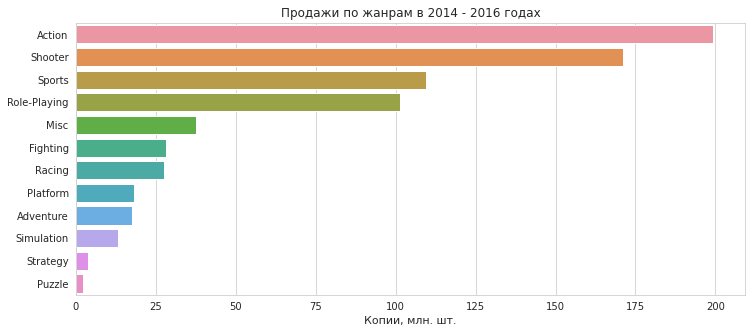

In [60]:
plt.rcParams['figure.figsize'] = (12, 5)
b = sns.barplot(data=d, x='sum_sales', y=d.index, orient='h')
b.set_title('Продажи по жанрам в 2014 - 2016 годах')
b.set_ylabel('')
b.set_xlabel("Копии, млн. шт.", fontsize=11)
plt.show()

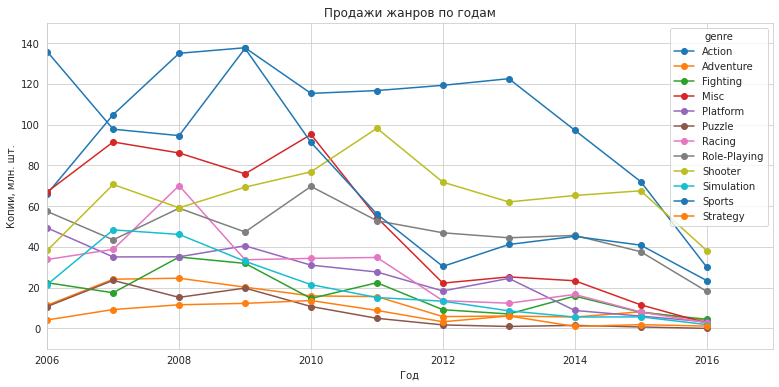

In [61]:
(data
     .query('year_of_release > 2005')
     .pivot_table(index='year_of_release', columns='genre', values='total_sales', aggfunc='sum')
     .plot(kind='line', style='o-', xlim=[2006,2017], ylim=[-10,150], figsize= [13,6], grid=True)
)
plt.title("Продажи жанров по годам")
plt.xlabel("Год")
plt.ylabel("Копии, млн. шт.")
plt.show()

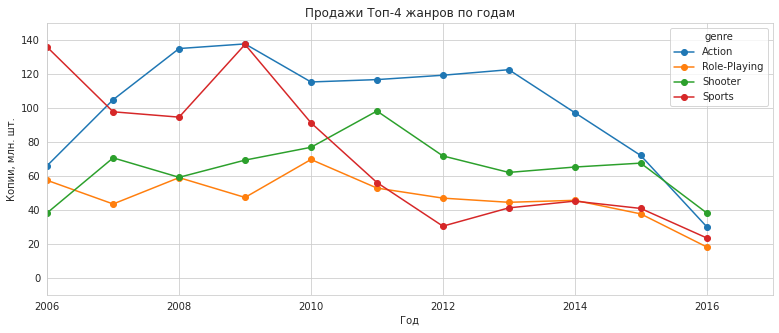

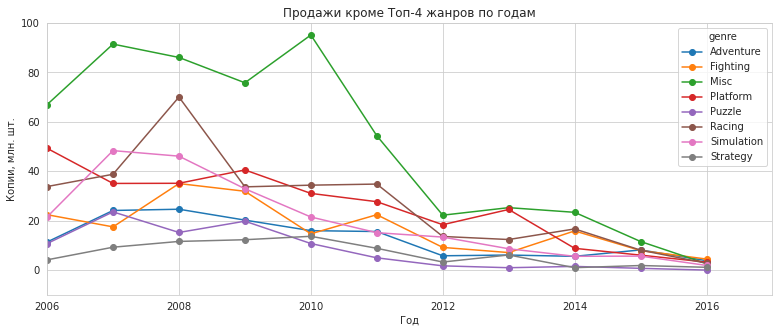

In [62]:
(data
     .query('year_of_release > 2005 and genre in @top_genres')
     .pivot_table(index='year_of_release', columns='genre', values='total_sales', aggfunc='sum')
     .plot(kind='line', style='o-', xlim=[2006,2017], ylim=[-10,150], figsize= [13,5], grid=True)
)
plt.title("Продажи Топ-4 жанров по годам")
plt.xlabel("Год")
plt.ylabel("Копии, млн. шт.")
plt.show()

(data
     .query('year_of_release > 2005 and genre not in @top_genres')
     .pivot_table(index='year_of_release', columns='genre', values='total_sales', aggfunc='sum')
     .plot(kind='line', style='o-', xlim=[2006,2017], ylim=[-10,100], figsize= [13,5], grid=True)
)
plt.title("Продажи кроме Топ-4 жанров по годам")
plt.xlabel("Год")
plt.ylabel("Копии, млн. шт.")
plt.show()  

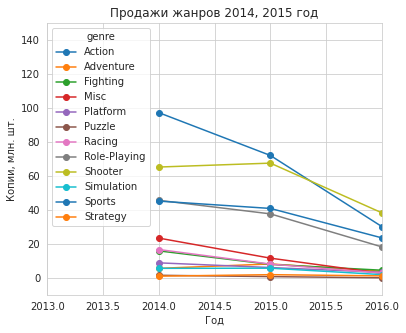

In [63]:
(adata
     .query('year_of_release > 2005')
     .pivot_table(index='year_of_release', columns='genre', values='total_sales', aggfunc='sum')
     .plot(kind='line', style='o-', xlim=[2013,2016], ylim=[-10,150], figsize= [6,5], grid=True)
)
plt.title("Продажи жанров 2014, 2015 год")
plt.xlabel("Год")
plt.ylabel("Копии, млн. шт.")
plt.show()

##### Полулярность жанров на перспективных платформах

**Общие продажи на перспективных платформах**

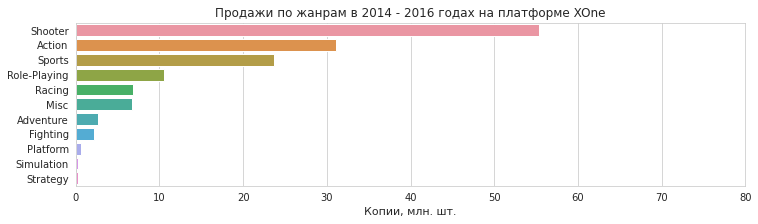

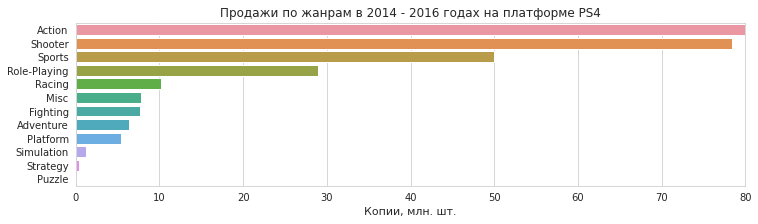

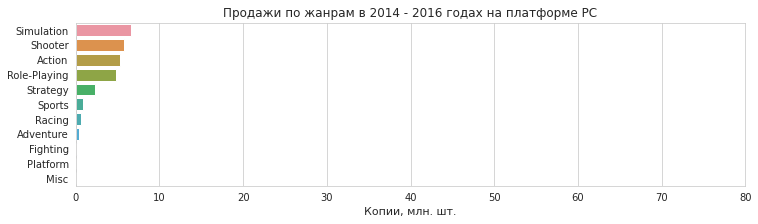

In [64]:
def plot_genres(platform):
    d = (adata
         .query('platform in @platform')
         .groupby('genre')
         .agg(sum_sales=pd.NamedAgg(column='total_sales', aggfunc='sum'))
         .sort_values(by= 'sum_sales', ascending=False)
        )
    b = sns.barplot(data=d, x='sum_sales', y=d.index, orient='h')
    b.set_title('Продажи по жанрам в 2014 - 2016 годах на платформе ' + platform)
    b.set_ylabel('')
    b.set_xlabel("Копии, млн. шт.", fontsize=11)

for platform in actual_platforms:
    plt.rcParams['figure.figsize'] = (12, 3)
    plt.xlim(0, 80)
    plot_genres(platform)
    plt.show()

In [65]:
d = adata[['name','genre','platform','total_sales']]

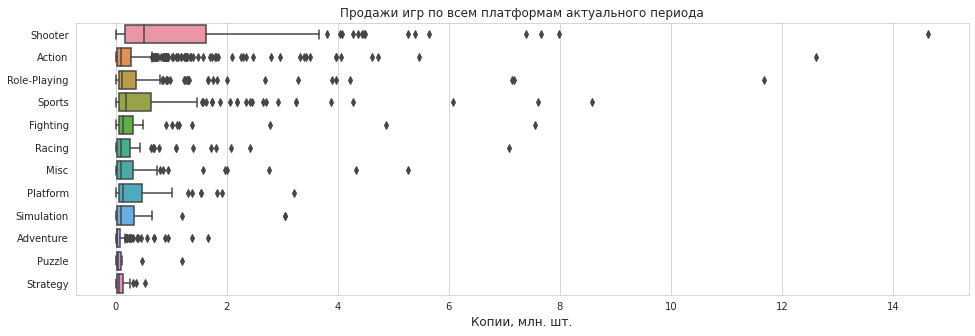

In [66]:
plt.rcParams['figure.figsize'] = (16, 5)
b = sns.boxplot(data=d, y='genre', x='total_sales', orient='h')
b.set_title('Продажи игр по всем платформам актуального периода')
b.set_xlabel("Копии, млн. шт.", fontsize=12)
b.set_ylabel("")
plt.show()

**Поиск наиболее прибыльных жанров внутри перспективных платформ**

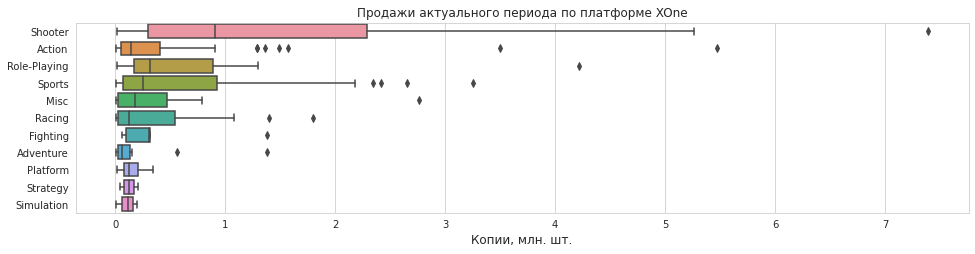

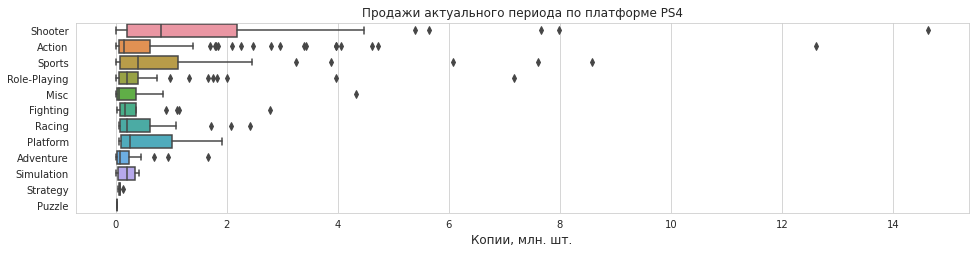

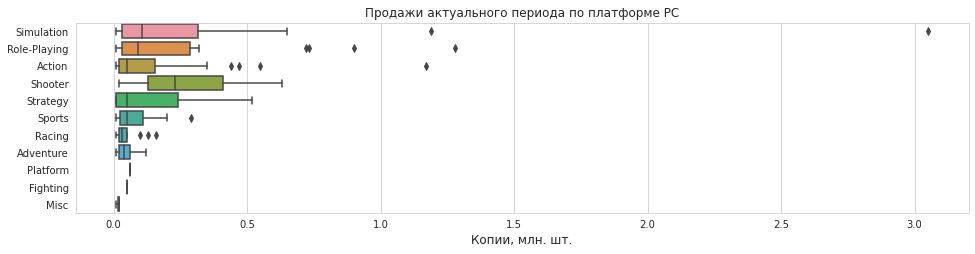

In [67]:
def plot_platform_sales(platform):
    r = (adata[['name','genre','platform','total_sales']]
         .query('platform == @platform')
        )
    plt.rcParams['figure.figsize'] = (16, 3.5)
    b = sns.boxplot(data=r, y='genre', x='total_sales', orient='h')
    b.set_title('Продажи актуального периода по платформe ' + platform)
    b.set_xlabel("Копии, млн. шт.", fontsize=12)
    b.set_ylabel("")
    plt.show()

for platform in actual_platforms:
    plot_platform_sales(platform)

#### Вывод по распределению жанров:

При оценке прибыльности жанров важно, что скрывается за общими продажами. Более прибыльными признаем жанры, где высокие средние показатели. Такие жанры будут давать более стабильный результат. Как, показал анализ, некоторые даже очень хорошие по общим продажам жанры могут давать хорошие общие показатели за счёт единичных супер-бестселлеров.  

**Оценка жанров по общим продажам:**  
Лидерами жанров по общим продажам являются:
- Action
- Shooter
- Sports
- Mics
- Role-playing

При этом `Action` и `Shooter` уверенно удерживают лидирующие позиции.

С течением времени популярность жанров может меняться. Так, например, `Sports` был на 1м и 2м месте до 2011 г. и затем утратил лидирующие позиции. Но, в целом, если рассатривать более короткие периоды, например, 2 года, предпочтения в жанрах меняются не быстро. Это говорит о том, что игроки остаются привержены любимому жанру, не смотря на смену приставок и выходу новых игр.  

Среди игровых платформ также существует разница в предпочитаемых жанрах. Среди приставок популярными являются примерно одни и те же жанры. Но есть существенная разница между приставками и PC.  
Например, жанр `Simulation` фявляется лидером продаж на PC но практически не популярен на приставках. (Это можно объяснить, например, наличием специальных игровыми контроллероы для симуляции).  
Также, на PC более популярным является жанр `Strategy`, не самый популярный на приставках.  

Совпадающие по выскокой популярности жанры на приставка и PC: `Shooter`, `Action`, `Sports`, `Role-playing`.

**Оценка жанров по прибыльности:**  
Наиболее прибыльные жанры платформы XOne:  
- Shooter
- Sports
- Role-playing
- Racing

Наиболее прибыльные жанры платформы PS4:  
- Shooter
- Sports
- Platform
- Action

Наиболее прибыльные жанры платформы PC:  
- Simulation
- Shooter
- Role-playing
- Strategy и Action

### Портрет пользователя каждого региона:
#### Самые популярные платформы (топ-5). Различия в долях продаж.

Данные содержат выделено 4 региона:  
- na_sales
- eu_sales
- jp_sales
- other_sales

In [68]:
def get_region_sales(region):
    q = (adata[['platform', 'genre', region]]
     .groupby('platform')
     .agg({region:'sum'})
     .sort_values(by= region, ascending= False)
     .reset_index()
     .rename(columns = {region : 'sales'})    
    )
    q['region'] = region
    return q

# Продажи региона по платформам
na_sales = get_region_sales('na_sales')
eu_sales = get_region_sales('eu_sales')
jp_sales = get_region_sales('jp_sales')
other_sales = get_region_sales('other_sales')

# Выделение top-5 для каждого региона
na_top_platforms = na_sales['platform'].head(5)
eu_top_platforms = eu_sales['platform'].head(5)
jp_top_platforms = jp_sales['platform'].head(5)
other_top_platforms = other_sales['platform'].head(5)

print("Top-5 платформ региона na: ", na_top_platforms.values)
print("Top-5 платформ региона eu: ", eu_top_platforms.values)
print("Top-5 платформ региона jp: ", jp_top_platforms.values)
print("Top-5 платформ региона other: ", other_top_platforms.values)
print()

top_plaforms = pd.concat([na_top_platforms, eu_top_platforms, jp_top_platforms, other_top_platforms]).unique()
print("Общий Топ популярных платформы среди Топ-5 в разных регионах:")
print(top_plaforms)

# Убираем лишние платформы из данных
na_sales = na_sales.query('platform in @top_plaforms')
eu_sales = eu_sales.query('platform in @top_plaforms')
jp_sales = jp_sales.query('platform in @top_plaforms')
other_sales = other_sales.query('platform in @top_plaforms')

# Объединение таблиц для совместного графика
platform_sales = pd.concat([na_sales, eu_sales, jp_sales, other_sales])

Top-5 платформ региона na:  ['PS4' 'XOne' 'X360' '3DS' 'PS3']
Top-5 платформ региона eu:  ['PS4' 'XOne' 'PS3' 'PC' '3DS']
Top-5 платформ региона jp:  ['3DS' 'PS4' 'PSV' 'PS3' 'WiiU']
Top-5 платформ региона other:  ['PS4' 'XOne' 'PS3' 'X360' '3DS']

Общий Топ популярных платформы среди Топ-5 в разных регионах:
['PS4' 'XOne' 'X360' '3DS' 'PS3' 'PC' 'PSV' 'WiiU']


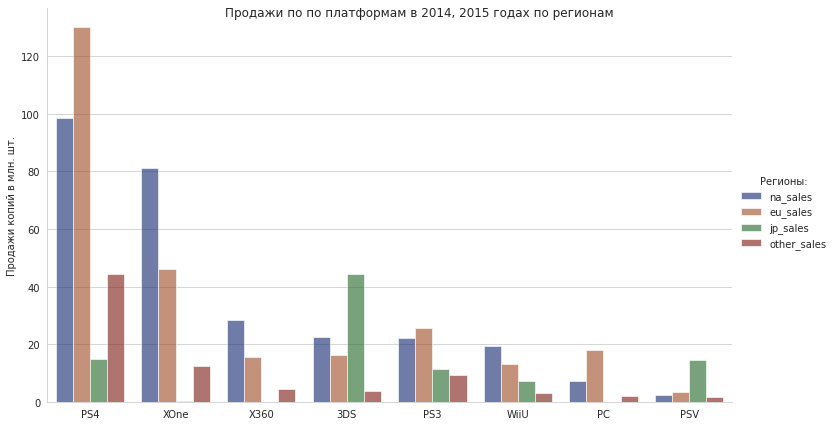

In [69]:
g = sns.catplot(
    data=platform_sales, kind="bar",
    x="platform", y="sales", hue="region",
    palette="dark", alpha=.6, height=6, aspect=1.7
)
#g.despine(left=True)
g.fig.suptitle('Продажи по по платформам в 2014, 2015 годах по регионам')
g.set_axis_labels("", "Продажи копий в млн. шт.")
g.legend.set_title("Регионы:")

In [70]:
def region_platforms_print(region):
    print('\n Top-5 популярных платформ в регионе', region)
    top_5 = (adata
                 .groupby('platform')
                 .agg(sum_sales=pd.NamedAgg(column=region, aggfunc='sum'))
                 .sort_values(by= 'sum_sales', ascending=False)
            )
    total_sales_region = top_5['sum_sales'].sum()
    top_5['sales_part_percent'] = top_5['sum_sales'] / total_sales_region * 100
    display(top_5.head(5))
    return

In [71]:
regions = adata[[x for x in adata.columns if ('sales' in x) and x !='total_sales']].columns.values
for region in regions:
    region_platforms_print(region)


 Top-5 популярных платформ в регионе na_sales


,sum_sales,sales_part_percent
platform,,
PS4,98.61,34.714497
XOne,81.27,28.610153
X360,28.30,9.962684
3DS,22.64,7.970147
PS3,22.05,7.762445



 Top-5 популярных платформ в регионе eu_sales


,sum_sales,sales_part_percent
platform,,
PS4,130.04,48.041968
XOne,46.25,17.086597
PS3,25.54,9.435496
PC,17.97,6.638836
3DS,16.12,5.955372



 Top-5 популярных платформ в регионе jp_sales


,sum_sales,sales_part_percent
platform,,
3DS,44.24,47.523902
PS4,15.02,16.134923
PSV,14.54,15.619293
PS3,11.22,12.052852
WiiU,7.31,7.852616



 Top-5 популярных платформ в регионе other_sales


,sum_sales,sales_part_percent
platform,,
PS4,44.48,54.496447
XOne,12.52,15.339378
PS3,9.37,11.480029
X360,4.35,5.329576
3DS,3.68,4.508699


In [72]:
def region_platforms_show(region):
    (adata
         .groupby('platform')
         .agg(sum_sales=pd.NamedAgg(column=region, aggfunc='sum'))
         .sort_values(by= 'sum_sales', ascending=False)
         .head(5)
         .sort_values(by= 'sum_sales', ascending=True)
         .plot(kind='barh', y='sum_sales', grid=True, figsize=(14, 2), label='Продажи', xlim= [0,100])
    )
    plt.title("Продажи Топ-5 по платформам в регионе " + region)
    plt.ylabel("")
    plt.xlabel("Копии, млн. шт.")
    plt.show()
    return

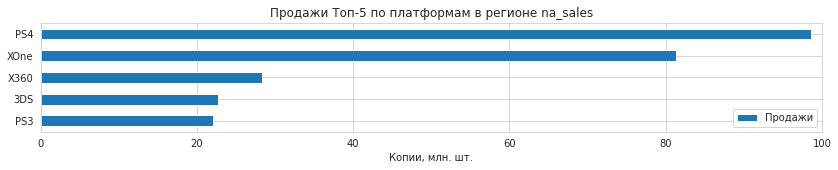

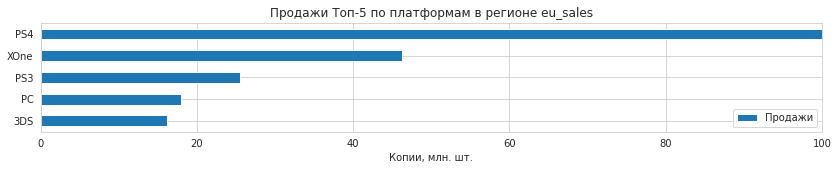

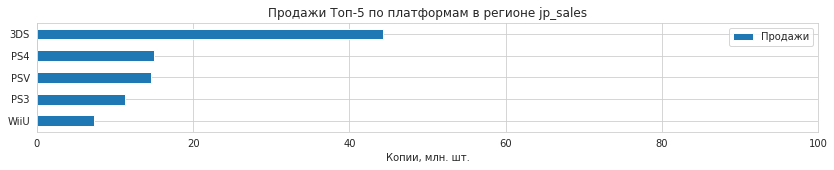

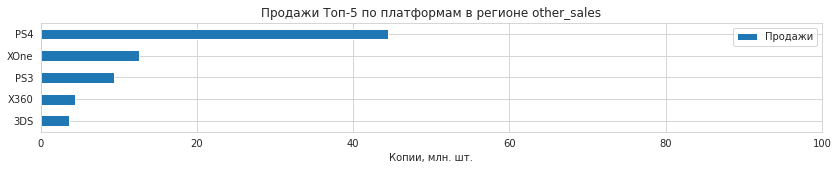

In [73]:
for region in regions:
    region_platforms_show(region)

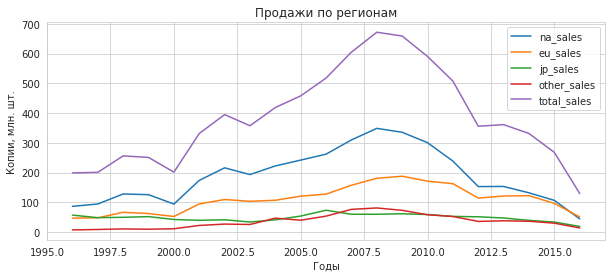

In [74]:
(data[[x for x in adata.columns if 'sales' in x] + ['year_of_release']]
     .query('year_of_release > 1995')
     .groupby('year_of_release')
     .sum()
     .plot(figsize=(10, 4))
)
plt.title("Продажи по регионам")
plt.xlabel("Годы")
plt.ylabel("Копии, млн. шт.")
plt.show()

#### Вывод о популярности платформ по регионам:

TOP-5 платформы отличаются в зависимости от региона продаж.  

Предпочтения Европе и Америке больше всего похожи. Но в Европе отмечается популярнсть более новых поколений новых приставок. А Америка продолжает играть в старые дольше. Самые популярные в этих регионах различные поколения PS и X360.  

Наибольший объем продаж наблюдается в Америке.
Похоже, что срок жизни платформ в Америке дольше, а у Европейцев новые платформы популярнее. 

В регионе EU в отличие от других в ТОП платформ входит PC.  

Наиболее сильно отличается от остальных регион Япония (jp). В Японии низкий рейтинг имеет платформа X360, имеющая очень существенную долю продаж в остальном мире. И в Японии почти не играют на PC. Также, в Японии наиболее стабльное количество продаваемых игр.

#### Самые популярные жанры (топ-5).

In [75]:
def region_genres_print(region):
    print('\n Популярность жанра по региону', region)
    top_5 = (adata
                 .groupby('genre')
                 .agg(sum_sales=pd.NamedAgg(column=region, aggfunc='sum'))
                 .sort_values(by= 'sum_sales', ascending=False)
            )
    total_sales_region = top_5['sum_sales'].sum()
    top_5['sales_part_percent'] = top_5['sum_sales'] / total_sales_region * 100
    display(top_5.head(5))
    return

def region_genres_show(region):
    (adata
         .groupby('genre')
         .agg(sum_sales=pd.NamedAgg(column=region, aggfunc='sum'))
         .sort_values(by= 'sum_sales', ascending=True)
         .plot(kind='barh', y='sum_sales', grid=True, figsize=(10, 4), label='Продажи', xlim= [0,80],)
    )
    plt.title("Продажи по жанрам в регионе " + region)
    plt.ylabel("")
    plt.xlabel("Копии, млн. шт.")
    plt.show()
    return

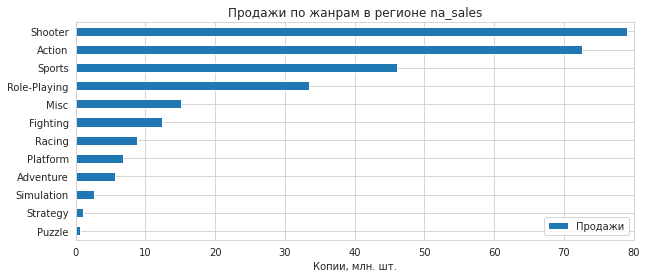

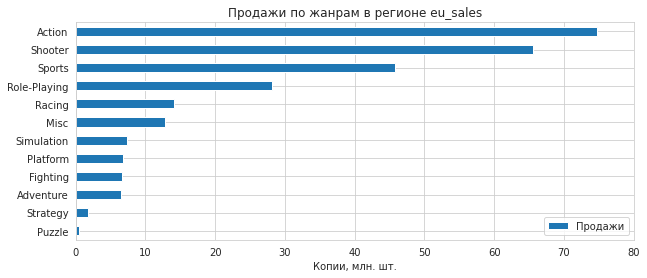

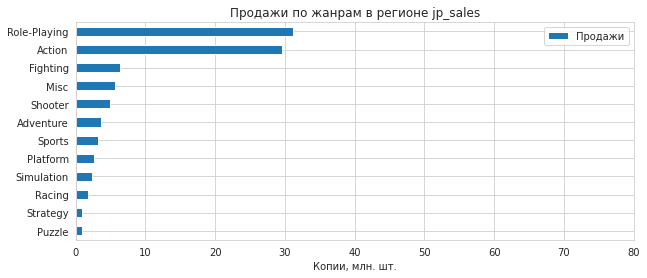

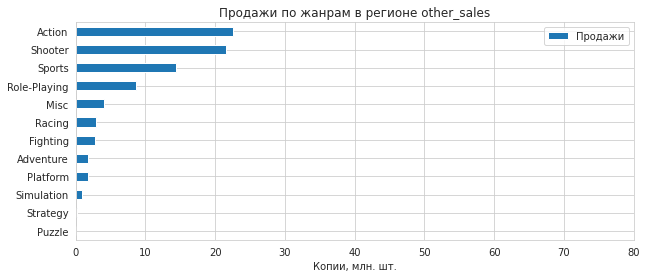

In [76]:
for region in regions:
    region_genres_show(region)

In [77]:
for region in regions:
    region_genres_print(region)


 Популярность жанра по региону na_sales


,sum_sales,sales_part_percent
genre,,
Shooter,79.02,27.818067
Action,72.53,25.533338
Sports,46.13,16.239527
Role-Playing,33.47,11.782722
Misc,15.05,5.298176



 Популярность жанра по региону eu_sales


,sum_sales,sales_part_percent
genre,,
Action,74.68,27.589774
Shooter,65.52,24.205704
Sports,45.73,16.894488
Role-Playing,28.17,10.407123
Racing,14.13,5.220186



 Популярность жанра по региону jp_sales


,sum_sales,sales_part_percent
genre,,
Role-Playing,31.16,33.472983
Action,29.58,31.775701
Fighting,6.37,6.842840
Misc,5.61,6.026426
Shooter,4.87,5.231496



 Популярность жанра по региону other_sales


,sum_sales,sales_part_percent
genre,,
Action,22.57,27.652536
Shooter,21.53,26.378339
Sports,14.36,17.593727
Role-Playing,8.64,10.585641
Misc,4.03,4.937515


#### Выаод по самым популярным жанрам (топ-5):

Жанр `Action` определённо самый популярный во всех регионах.  

В Америке на равных с самым популярным жанром Action выступает жанр `Shooter`.  

В остальном распределени популярности жанров в регинах Америка, Европа и other очень похожи. В Европе лишь немног менее популярен, чем в Америка жанр `Fighting`.  

Регион Япония существенно отличает по предпочтениям от остального мира. Даже самый популярный в мире жанр Action занимает там второе место. На первом месте в Японии жанр `Role-Playing`. Популярные в других регионах жанры `Sports` и `Racing` в Японии имеют меньшую популярность.

#### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [78]:
print('Все рейтинги:')
display(data['rating'].unique())
print('Рейтинги, актуальные в 2014, 2015 г.:')
display(adata['rating'].unique())

Все рейтинги:


array(['E', 'unknown', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

Рейтинги, актуальные в 2014, 2015 г.:


array(['unknown', 'M', 'E', 'T', 'E10+'], dtype=object)

In [79]:
esrb_ratings = adata['rating'].unique()
summary = pd.DataFrame(esrb_ratings, columns= ['rating'])

print('\n Продажи по рейтингу ESRB по регионам')
for region in regions:
    sales_by_rating = (adata
                 .groupby('rating')
                 .agg(sum_sales=pd.NamedAgg(column=region, aggfunc='sum'))
                 .reset_index()
            )
    total_sales_region = sales_by_rating['sum_sales'].sum()
    sales_by_rating['sales_part_percent'] = np.round((sales_by_rating['sum_sales'] / total_sales_region * 100), 2)
    sales_by_rating.rename(columns = {'sum_sales': region, 'sales_part_percent' : region + '_percent'}, inplace= True)
    summary = summary.merge(sales_by_rating, on='rating', how='outer')

summary


 Продажи по рейтингу ESRB по регионам


,rating,na_sales,na_sales_percent,eu_sales,eu_sales_percent,jp_sales,jp_sales_percent,other_sales,other_sales_percent
0,unknown,64.72,22.78,58.95,21.78,56.90,61.12,18.40,22.54
1,M,96.42,33.94,93.44,34.52,8.01,8.60,28.67,35.13
2,E,50.74,17.86,58.06,21.45,8.94,9.60,15.39,18.86
3,T,38.95,13.71,34.07,12.59,14.78,15.88,11.33,13.88
4,E10+,33.23,11.70,26.16,9.66,4.46,4.79,7.83,9.59


In [80]:
def get_region_sales_by_rating(region):
    q = (adata[['rating', region]]
     .groupby('rating')
     .agg({region:'sum'})
     .sort_values(by= region, ascending= False)
     .reset_index()
     .rename(columns = {region : 'sales'})    
    )
    q['region'] = region
    return q

# Продажи региона по платформам
na_sales_rating = get_region_sales_by_rating('na_sales')
eu_sales_rating = get_region_sales_by_rating('eu_sales')
jp_sales_rating = get_region_sales_by_rating('jp_sales')
other_sales_rating = get_region_sales_by_rating('other_sales')

all_rating = pd.concat([na_sales_rating, eu_sales_rating, jp_sales_rating, other_sales_rating])

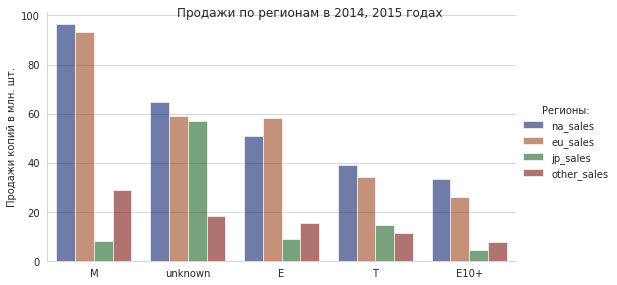

In [81]:
g = sns.catplot(data=all_rating, kind="bar", 
                x="rating", y="sales", hue="region",
                palette="dark", alpha=.6, height=4, aspect=1.8
               )
#g.despine(left=True)
g.fig.suptitle('Продажи по регионам в 2014, 2015 годах')
g.set_axis_labels("", "Продажи копий в млн. шт.")
g.legend.set_title("Регионы:")

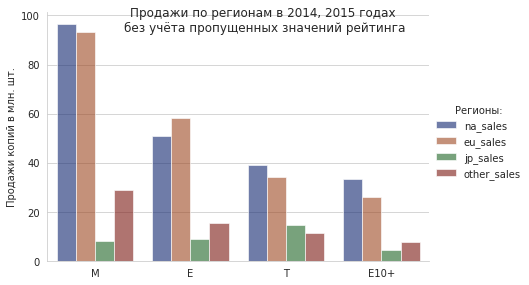

In [82]:
all_rating = all_rating.query('rating != "unknown"')
g = sns.catplot(data=all_rating, kind="bar", 
                x="rating", y="sales", hue="region",
                palette="dark", alpha=.6, height=4, aspect=1.5
               )
#g.despine(left=True)
g.fig.suptitle('Продажи по регионам в 2014, 2015 годах \nбез учёта пропущенных значений рейтинга')
g.set_axis_labels("", "Продажи копий в млн. шт.")
g.legend.set_title("Регионы:")

#### Вывод о влиянии рейтинга ESRB на продажи в отдельном регионе:

По рейтингу ESRB продажи в регинах _NA, EU, other_ похожи друг на друга. Лидерs - рейтинг `M`("17+") и `E`("для всех").  

Продажи в Японии сильно отличаются от остального мира.  
Доля игр с неизветным рейтингом там самая большая.  
В лидерах рейтинг `T` ("13+").
Это может говорить о том, что в Японии другая система рейтингов.  

В данных имеется очень большое количество пропущенных данных о рейтингах: Rating - 6766 записи - 40.5% от общего.  
Это сказалось и анализе влияния рейтинга.

### Общий вывод
**Вывод по общему анализу данных:**

- 16715 записей о проданных играх
- 11560 названий игр из 16715 уникальны. Т.е., примерно 5200 игр мультиплатформенные.

**Пропущенные значения:**
   - Name - 2 записи - 0.01% от общего
   - Gemre - 2 записи - 0.01% от общего
   - Year_of_Release - 269 записи - 1.6% от общего
   - Critic_Score - 8578 записи - 51.3% от общего
   - User_Score - 6701 записи - 40.1% от общего
   - Rating - 6766 записи - 40.5% от общего  
   
   
**update:** При дальнейшем анализе обнаружено большее количество пропущенных занчений в столбце 'user_score' -  
пропущего 9125 записей - 54.6% от общего.

**Необходимые преобразования типов:**
   - Столбец 'Year_of_Release' (год выпуска) необходимо перевести в int
   - Столбец 'User_Score' (оценка пользователей (максимум 10) необходимо перевести в тип float

Текстовые категориальные данные: 'Платформа', 'Жанр игры' потенциально могуть содержат вариации в написании.  

**Вывод по предобработке данных:**

- Названия столбцов приведены к нижнему регистру.  


- Название игр - name
Было пропущенных значений name - 2 записи - 0.01%. Заполнены значением `'_unknown'`.  
Пропуски в названии игры и годе её выпуска явно вызваны потерей информации. Причины пропусков не понятны, т.к. информация взята из открытых источников.  


- Жанр игры - genre  
Было пропущенных значений gemre - 2 записи - 0.01%. Заполнены значением `'_unknown'`. 
 
 
- Год выпуска игры - year_of_release  
Было пропущенных значений year_of_release - 269 записи - 1.6%. Заполнены значением `1900`  
Причины пропуска неизвестны. Существует трудоемкая возможность заполнения данных вручную.  
Произведено преобразование типа к int64.  


- Оценка критиков - critic_score  и Оценка пользователей - user_score  
Critic_Score - 8578 записи - 51.3% от общего  
User_Score - 9125 записей - 54.6% от общего  
Доля пропущенных значений существенна. Часть пропусков данных (181 пропуск) были заполнены на основе предположения, что мультиплатформеные игры одинаково популярны на всех платформах. Для заполнения пропусков брались средние оценки с другой платформы. Такое заполнение не вполне верно, но значимость зависит от исследуемых вопросов.  
Остальнрые пропуски заполнены значением-маркером `-1`  
Тип данных преобразован в int64.  


- Рейтинг - rating  
Было пропущенных значений Rating - 6766 записи - 40.5% от общего.  
Отсутствующие данные рейтинга ESRB восстановить невозможно. Также, вероятно, что такие данные предоставляются не во всех регионах.  
Для избавления от NaN, пропуски заполнены значением-маркером `-1`  

**Вывод по суммарным продажам:**
Данные содержат информацию о продажах **8915.71 млн.** копий игр.  

**Вывод по количеству игр, выпускавшихся в разные годы:**

`1900` год - это значение-маркёр для пропущенных данных.  
- В период с 1980 по 1990 годы компьютерные игры были доступны немногим. В 1991 году наюлюдается саое начало развития этого рынка, а уже в 1993-1994 происходит удвоение количества продаваемых игр.  
- В 2001-2002 году происходит значительный скачок и дальнейший бурный рост до 2008 года.
- С 2009 по 2013 года происходит спад в 2 раза. 
- В период с 2012 до 2016 продажи остаются примерно на одном уровне.  

Характер рынка довольно динамичен. Видно, что ситуация может быстро измениться даже в течение 2-3 лет.  
Также, далее будет проведен анализ популярных платформ, где ожидается также небольшое время жизни.  

Из-за высокой динамики представляется нецелессобразным рассмотрение длительной рестроспективы при анализе и прогнозировании. 
Скорее всего, оптимальным для рассмотрения будет период не более 2-3 лет.  

**Выводы о продажах по годам среди платформ:**

*Топ-6 платформ по продажам составляют:*
- PS: 1994 - 2003 гг. (7 лет)
- PS2: 2000 - 2011 гг. (11 лет)
- PS3: 2006 - 2016 гг. (10 лет)
- DS: 2004 - 2013 гг. (9 лет)
- X360: 2005 - 2016 гг. (11 лет)
- Wii: 2006 - 2016 гг. (10 лет)

Платформы PS, PS2 были безоговорочными и единственными лидерами рынка с 1994 по 2005 год.  
С 2005 года на рынке выступили новые платформы.  
В 2010 плаформа Wii потеряла лидерство и с тех пор, практически на равных в лидерах остаются платформы X360 и PS3.  

За срок жизни платформы можно принять срок в **9-10 лет**.  
При этому следует учесть, что период роста продаж с 1 до 4 лет.  
Пик продаж платформы приходится на её 4...6 годы жизни. В годы смены поколений консоли происходит характерное "проседание" в продажах, когда предыдущее поколение теряет продажи, а новое не успело их нарастить.  
После 8 лет плаформа прктически перестает быть интересной.  

При прогнозировании стоит учитывать только наиболее современные платформы.  

**Вывод о лидирующих и потенциально прибыльных платформах:**

Характер распределения количества проданных игр примерно одинаков большинства для приставок. Иммется довольно много выбросов с большим количеством продаж. Это бестселлеры.
Самые характерины представители: 3DS, DS, PS, PS2, PS3, PS4, PSP, SNES, Wii, WiiU, X360, XB, XOne.

Выделяются платформы, где существенно меньше явных бестселлеров, но довольно высокие средние значения по кол-ву проданных копий: GB, GEN, NES.

Также, интересную особенность имеет платформа PС, где есть очень успешные бестселлеры наряду с невысокими средними продажами.
На платформе PC стандартное отклонение меньше, что говорит о том, что там преимущественно покупаются игры со схожей популярностью.   

В качестве актуального периода для построения прогноза выбран короткий промежуток данных - только за 2014, 2015 годы и неполные данные за 2016 год.  

В актуальном периоде лидирующие платформы: PS4, XOne, 3DS, PS3

- Растущие платоформы: PS4, XOne
- На спаде продаж: все остальные, включая лидирующие 3DS, PS3
- Платформа PC наиболее стабильна на протяжении времени

В качестве потенциально прибыльных платформ выбраны: PS4, XOne, PC  
Платформы PS4 и XOne являются потенциальными лидерами рынка и характер продаж для них характерен для рынка игр для приставок.  
Платформа PC имеет свои особенности в распределении продаж и отличается более долгим срок жизни платформы.


**Вывод о влиянии на продажи отзывов пользователей и критиков:**

Оценки пользователей и оценки критиков сильно коррелируют, особенно на приставках. На рынке игр PC такая корреляция чуть ниже. Там пользователи меньше согласны с критиками. Пользователи склонны давать более низкие оценки, чем критики. Для игр с более высокими баллами оценки критиков и пользователей совпадают лучше.  

Оценки пользователей и критиков более единодушны на платформах, которые уже давно на рынке. А в новых платформах пользователи могут оценивать игра ниже, чем критики.  

**Корреляция оценок критиков и продаж**  
На игровых приставках (XOne, PS4) между оценками критиков и продажами есть умеренная положительная связь (коэффициент корреляции около 0.4). Что говорит о том, что мнение профессионалов важно при прогнозировании продаж новой игры для этих платформ. (Критики являются "лидерами мнения" и это используется для продвижения новых игр. Налицие корелляции также указывает на эффективность продвижения через этот канал.)  

Для платформы PC корелляция с оценками критиков слабая (0.17), т.е. на платформе PC оценки критиков имеют меньшую роль.  

**Корреляция оценок пользователей и продаж**
Так при покупке игр слово, все-таки за пользователями, оценивалась корреляция между оценками пользователей и продажами.  
Продажи почти не коррелируют с оценками пользователей. Однако, игры с низкими оценками имеют низкие продажи. А игры с самым выскоми рейтингом могут быть не хитами продаж.

**Вывод по распределению жанров:**

При оценке прибыльности жанров важно, что скрывается за общими продажами. Более прибыльными признаем жанры, где высокие средние показатели. Такие жанры будут давать более стабильный результат. Как, показал анализ, некоторые даже очень хорошие по общим продажам жанры могут давать хорошие общие показатели за счёт единичных супер-бестселлеров.  

**Оценка жанров по общим продажам:**  

Лидерами жанров по общим продажам являются:
- Action
- Shooter
- Sports
- Mics
- Role-playing

При этом `Action` и `Shooter` уверенно удерживают лидирующие позиции.

С течением времени популярность жанров может меняться. Так, например, `Sports` был на 1м и 2м месте до 2011 г. и затем утратил лидирующие позиции. Но, в целом, если рассатривать более короткие периоды, например, 2 года, предпочтения в жанрах меняются не быстро. Это говорит о том, что игроки остаются привержены любимому жанру, не смотря на смену приставок и выходу новых игр.  

Среди игровых платформ также существует разница в предпочитаемых жанрах. Среди приставок популярными являются примерно одни и те же жанры. Но есть существенная разница между приставками и PC.  
Например, жанр `Simulation` фявляется лидером продаж на PC но практически не популярен на приставках. (Это можно объяснить, например, наличием специальных игровыми контроллероы для симуляции).  
Также, на PC более популярным является жанр `Strategy`, не самый популярный на приставках.  

Совпадающие по выскокой популярности жанры на приставка и PC: `Shooter`, `Action`, `Sports`, `Role-playing`.

**Оценка жанров по прибыльности:**  
Наиболее прибыльные жанры платформы XOne:  
- Shooter
- Sports
- Role-playing
- Racing

Наиболее прибыльные жанры платформы PS4:  
- Shooter
- Sports
- Platform
- Action

Наиболее прибыльные жанры платформы PC:  
- Simulation
- Shooter
- Role-playing
- Strategy и Action


**Вывод о популярности платформ по регионам:**

TOP-5 платформы отличаются в зависимости от региона продаж.  

Предпочтения Европе и Америке больше всего похожи. Но в Европе отмечается популярнсть более новых поколений новых приставок. А Америка продолжает играть в старые дольше. Самые популярные в этих регионах различные поколения PS и X360.  

Наибольший объем продаж наблюдается в Америке.
Похоже, что срок жизни платформ в Америке дольше, а у Европейцев новые платформы популярнее. 

В регионе EU в отличие от других в ТОП платформ входит PC.  

Наиболее сильно отличается от остальных регион Япония (jp). В Японии низкий рейтинг имеет платформа X360, имеющая очень существенную долю продаж в остальном мире. И в Японии почти не играют на PC. Также, в Японии наиболее стабльное количество продаваемых игр.  

**Выаод по самым популярным жанрам (топ-5):**

Жанр `Action` определённо самый популярный во всех регионах.  

В Америке на равных с самым популярным жанром Action выступает жанр `Shooter`.  

В остальном распределени популярности жанров в регинах Америка, Европа и other очень похожи. В Европе лишь немног менее популярен, чем в Америка жанр `Fighting`.  

Регион Япония существенно отличает по предпочтениям от остального мира. Даже самый популярный в мире жанр Action занимает там второе место. На первом месте в Японии жанр `Role-Playing`. Популярные в других регионах жанры `Sports` и `Racing` в Японии имеют меньшую популярность.  

**Вывод о влиянии рейтинга ESRB на продажи в отдельном регионе:**

По рейтингу ESRB продажи в регинах _NA, EU, other_ похожи друг на друга. Лидерs - рейтинг `M`("17+") и `E`("для всех").  

Продажи в Японии сильно отличаются от остального мира.  
Доля игр с неизветным рейтингом там самая большая.  
В лидерах рейтинг `T` ("13+").
Это может говорить о том, что в Японии другая система рейтингов.  

В данных имеется очень большое количество пропущенных данных о рейтингах: Rating - 6766 записи - 40.5% от общего.  
Это сказалось и анализе влияния рейтинга.
